# Assignment 2 - Regression (gradient descent)

In [247]:
# Usual Imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.model_selection as skms
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import add_dummy_feature
from math import ceil
from math import sqrt

## Part A: Data Cleaning

In [2]:
data = pd.read_csv("../Data/bottle.csv",low_memory=False)
data.shape

(864863, 74)

In [3]:
extracted_data_1 = data[['T_degC', 'Salnty', 'STheta', "O2ml_L", "Depthm"]]
extracted_data_1 = extracted_data_1.dropna()
extracted_data_1.shape

(661268, 5)

In [4]:
extracted_data_2 = extracted_data_1[extracted_data_1["STheta"]<=50]
extracted_data_2.shape

(661268, 5)

As we can see, the removal of the outliers has allowed the data to be better presented on a more suitable scale.

## Part B: Train & Test Split:

In [171]:
X_train,X_test,y_train,y_test = skms.train_test_split(extracted_data_2[["STheta","Salnty", "O2ml_L", "Depthm"]].to_numpy(),extracted_data_2[["T_degC"]].to_numpy(),test_size=0.20, random_state=42)

Now we perform the scaling using the Standard Scaler Module

In [172]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(X_test)

In [173]:
def find_metrics(y_test,y_pred):
    mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
    r2_scores = r2_score(y_true=y_test,y_pred=y_pred)
    exp_var = explained_variance_score(y_true=y_test,y_pred=y_pred)
    return pd.DataFrame({"MSE" : [mse],"R Squared Score": [r2_scores],"Explained Variance": [exp_var]})

## Part C: Linear Regression with sklearn

In [174]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_pred_sklearn = lin_reg.predict(X_test_scaled)
find_metrics(y_test=y_test,y_pred=y_pred_sklearn)

[10.91541795] [[-4.6345913   1.63046569  0.3020677  -0.47495536]]


,MSE,R Squared Score,Explained Variance
0,0.11122,0.993757,0.993763


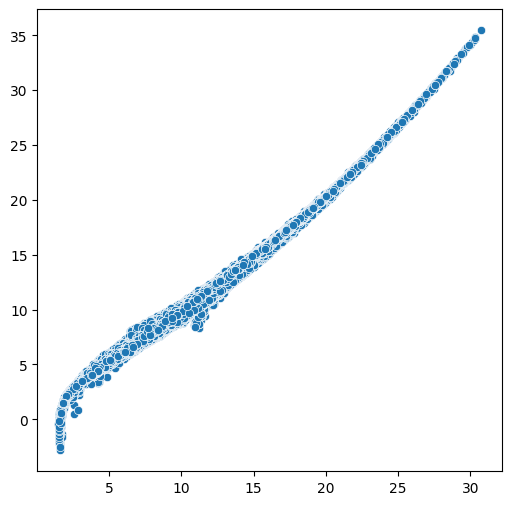

In [188]:
fig_2,axes_2 = plt.subplots(1,1,figsize=(6,6))
st_t_deg = sns.scatterplot(x=y_test[:,0],y=y_pred_sklearn[:,0],ax=axes_2)

## Part D: Gradient Descent Mini-Batch

In [193]:
class MBGDLinearRegression:
    
    def fit(self,X,y,n_epochs,minibatch_size,eta):
        np.random.seed(42)
        betas = add_dummy_feature(X)
        n_dims = X.shape[1]+1
        theta = np.random.randn(n_dims,1)
        m = len(betas)
        n_batches_per_epoch = ceil(m / minibatch_size)
        for epoch in range(n_epochs):
            shuffled_indices = np.random.permutation(m)
            X_b_shuffled = betas[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            for iteration in range(0, n_batches_per_epoch):
                idx = iteration * minibatch_size
                xi = X_b_shuffled[idx : idx + minibatch_size]
                yi = y_shuffled[idx : idx + minibatch_size]
                gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
                theta = theta - eta * gradients
        self.thetas = theta
    def predict(self,X):
        beta_pred = add_dummy_feature(X)
        return beta_pred.dot(self.thetas)

Running for a minibatch size = 50,  eta = 0.1,  epochs=100

In [232]:
mbgd_linreg = MBGDLinearRegression()
mbgd_linreg.fit(X_train_scaled, y_train,100,50,0.1)
print(mbgd_linreg.thetas)

[[10.94831182]
 [-4.69795046]
 [ 1.66596957]
 [ 0.34369036]
 [-0.37783529]]


In [233]:
y_pred_mbgd_50 = mbgd_linreg.predict(X_test_scaled)
metrics_50 = find_metrics(y_test=y_test,y_pred=y_pred_mbgd_50)
metrics_50

,MSE,R Squared Score,Explained Variance
0,0.118163,0.993367,0.993394


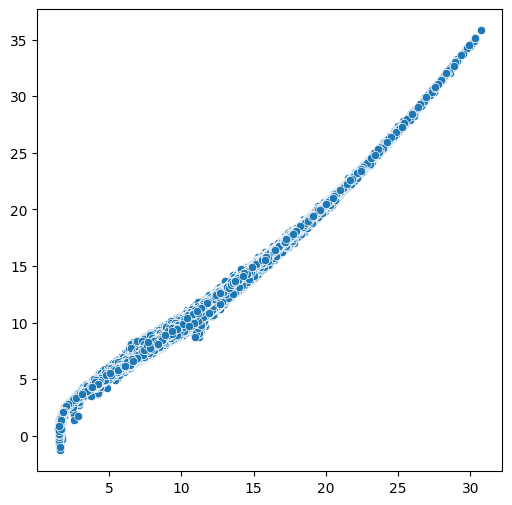

In [234]:
fig_3,axes_3 = plt.subplots(1,1,figsize=(6,6))
st_t_deg = sns.scatterplot(x=y_test[:,0],y=y_pred_mbgd_50[:,0],ax=axes_3)

In [235]:
y_pred_mbgd_50_train = mbgd_linreg.predict(X_train_scaled)
train_metrics_50 = find_metrics(y_test=y_train,y_pred=y_pred_mbgd_50_train)
train_metrics_50

,MSE,R Squared Score,Explained Variance
0,0.118167,0.993382,0.993442


In [236]:
mbgd_linreg.fit(X_train_scaled, y_train,100,250,0.1)
print(mbgd_linreg.thetas)

[[10.93058366]
 [-4.65645869]
 [ 1.64538769]
 [ 0.31138468]
 [-0.43051971]]


In [237]:
y_pred_mbgd_250 = mbgd_linreg.predict(X_test_scaled)
metrics_250 = find_metrics(y_test=y_test,y_pred=y_pred_mbgd_250)
metrics_250

,MSE,R Squared Score,Explained Variance
0,0.112253,0.993699,0.9937


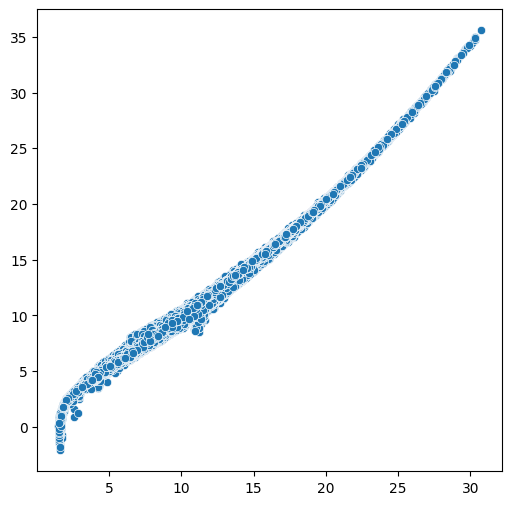

In [238]:
fig_3,axes_3 = plt.subplots(1,1,figsize=(6,6))
st_t_deg = sns.scatterplot(x=y_test[:,0],y=y_pred_mbgd_250[:,0],ax=axes_3)

In [239]:
y_pred_mbgd_250_train = mbgd_linreg.predict(X_train_scaled)
train_metrics_250 = find_metrics(y_test=y_train,y_pred=y_pred_mbgd_250_train)
train_metrics_250

,MSE,R Squared Score,Explained Variance
0,0.112233,0.993714,0.993727


In [240]:
mbgd_linreg.fit(X_train_scaled, y_train,100,2000,0.1)
print(mbgd_linreg.thetas)

[[10.91728431]
 [-4.63842578]
 [ 1.63566517]
 [ 0.29970095]
 [-0.46759502]]


In [241]:
y_pred_mbgd_2k = mbgd_linreg.predict(X_test_scaled)
metrics_2k = find_metrics(y_test=y_test,y_pred=y_pred_mbgd_2k)
metrics_2k

,MSE,R Squared Score,Explained Variance
0,0.111122,0.993762,0.993766


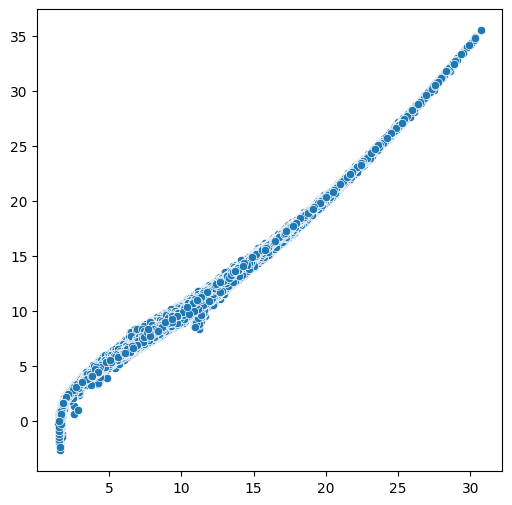

In [242]:
fig_5,axes_5 = plt.subplots(1,1,figsize=(6,6))
st_t_deg = sns.scatterplot(x=y_test[:,0],y=y_pred_mbgd_2k[:,0],ax=axes_5)

In [245]:
y_pred_mbgd_2k_train = mbgd_linreg.predict(X_train_scaled)
train_metrics_2k = find_metrics(y_test=y_train,y_pred=y_pred_mbgd_2k_train)
train_metrics_2k

,MSE,R Squared Score,Explained Variance
0,0.110704,0.9938,0.9938


In [256]:
metrics = pd.concat([metrics_50,metrics_250,metrics_2k])
metrics.index = [50,250,2000]
metrics["RMSE"] = metrics["MSE"]**(1/2)
metrics

,MSE,R Squared Score,Explained Variance,RMSE
50,0.118163,0.993367,0.993394,0.343748
250,0.112253,0.993699,0.993700,0.335042
2000,0.111122,0.993762,0.993766,0.333350


In [257]:
metrics_train = pd.concat([train_metrics_50,train_metrics_250,train_metrics_2k])
metrics_train.index = [50,250,2000]
metrics_train["RMSE"] = metrics_train["MSE"]**(1/2)
metrics_train

,MSE,R Squared Score,Explained Variance,RMSE
50,0.118167,0.993382,0.993442,0.343754
250,0.112233,0.993714,0.993727,0.335012
2000,0.110704,0.993800,0.993800,0.332722


In [258]:
adjusted_metrics = metrics - metrics_train
adjusted_metrics = adjusted_metrics.abs()
adjusted_metrics

,MSE,R Squared Score,Explained Variance,RMSE
50,0.000004,0.000015,0.000048,0.000005
250,0.000020,0.000016,0.000027,0.000030
2000,0.000418,0.000038,0.000034,0.000627


## Part E: Conceptual Questions

#### 1. Describe how parameter estimation in Gradient Descent differs from using the normal equation?
Parameter estimation in Gradient Descent is done iteratively, instead of being done at run. This is done in order to arrive at a minimum in a faster time as, solving the normal equation increases exponentially with an increase in the size of the parameters.

Normal Equations finds the Parameters by finding the closed form solution:

$$ \theta = \left(X^{T}X\right)^{-1}\cdot X^{T}\cdot y $$

The Mini Batch Gradient Descent, instead iteratively solves a closed form solution over a smaller amount of data using the mse as the cost function:

$$\left[\theta_{j} = \theta_{previous} - \eta * Gradient \right]^{n}$$

The learning rate is a hyper-parameter that can be tuned and the gradient is calculated as :

$$Gradient = \frac{2}{BatchSize} * X^{T} \cdot \left(X^{T} \cdot  \theta_{previous} - y\right)$$

#### 2. We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

Mini Batch Gradient Descent and Stochastic Gradient Descent can both be considered as modifications of the original Batch Gradient Descent Algorithm. The difference lies in the batch size. In Batch Gradient Descent, the batch size is the size of the array. In Stochastic Gradient Descent, the batch size is the size of an individual data instance, or 1. In Mini Batch Gradient Descent, the value of the batch ranges from 1 to N, Where N is the size of the array. 


#### 3. Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.
The best performing version of our Mini Batch Gradient Descent is the 2000 Batch Size run. It has the lowest $MSE$ and the highest $R^{2}$ score amongst all the other models. When comparing the Test vs Training metrics, we can see that the run with 50 as the batch size has the best performance, as the delta is only $0.4*10^{4}$ This shows that the model with batch size 50 does not suffer from over-fitting, while the model with 2000 might suffer from overfitting.

#### 4. Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

The Learning rate or $\eta$ is the size of the downhill rate each step will take. When $\eta$ is too low, the model will take longer to converge, but it will have a better estimate, wheras the opposite will occur with a larger $\eta$, and it might not even converge. It is beneficial to lower the $\eta$ over time so that the model will descend faster initially, and will overcome local minimas, but it will become more precise the closer it get to the actual minima.

#### 5. Why would a data scientist want to use early stopping in gradient descent? 
When training a model with gradient descent, there is a possibility that the cost function, might start increasing as the model starts to overfit. In such an instance it is better to stop the algorithm and use the lowest cost value as the minimum. This is called as early stopping. It is beneficial as it prevent over-fitting and saves training time.   